<a href="https://colab.research.google.com/github/Samreen4/cap-comp215/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project:-2 Langton’s Ant
## By:- Sachjeevan Singh and Samreen Kaur
______________________________________________

# Discription:
this code creates an animation of langton's ant model where an ant move from one cell to another changing its color if the cell is white it changes to black and if the cell is black it changes to white.

#Rules:


1.   Rule 1: If the ant is on white cell the in turn 90 degree clockwise and move forward one step
2.   Rule 2: If the ant is on black cell the in turn 90 degree counter-clockwise and move forward one step



#Objective:
*   to develop another 2D CA similar to Game of Life
*   to experiment with interactions between persistent patterns

#Importing modules:
In this cell all the needed modules are being imported like matplotlib, timeit, and numpy.










In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import time
from timeit import timeit

#Function and class:
plot_2d_array and class Animation2D are from comp215 repository and lab7.

credit- this idea was of arsh who helped me with this part







In [ ]:
def plot_2d_array(array, axes=None, title='', cmap='Greys', **options):
    """
    Plot the 2D array as an image on the given axes  1's will be black, 0's will be white.

    :param axes: the axes to plot on, or None to use the `plt.gca()` (current axes)
    :param options: keyword arguments passed directly to `plt.imshow()`
           see https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html
    """
    axes = axes or plt.gca()  # If not axes are provided, draw on current axes
    axes.set_title(title)
    # Turn off axes labels and tick marks
    axes.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False ,
                     labelbottom=False, labeltop=False, labelleft=False, labelright=False,)
    # Defaults for displaying a "matrix" with hard-pixel boundaries and (0,0) at top-left
    options = {**dict(interpolation='nearest', origin='upper'), **options}
    axes.imshow(array, cmap=cmap, **options)


class Animation2D:     #used the same Animation2D class from lab-7
    """
      Animates any 2D model with a step() method and a draw() method, using matplotlib
      model.step() should take no parameters - just step the model forward one step.
      model.draw() should take 2 parameters, the matpltolib axes to draw on and an integer step number
    """

    def __init__(self, model, frames=50, figsize=(8, 8)):
        """
        :param model: the simulation object to animate, with step() and draw(axes, step) methods
        :param frames: number of animation frames to generate
        """
        self.model = model
        self.frames = frames
        self.fig, self.ax = plt.subplots(figsize=figsize)

    def animation_step(self, step):
        """ Step the model forward and draw the plot """
        if step > 0:
            self.model.step()
        self.model.draw(self.ax, step=step)

    def show(self):
        """ return the matplotlib animation object, ready for display """
        anim = animation.FuncAnimation(self.fig, self.animation_step, frames=self.frames)
        plt.close()  # this ensures the last frame is not shown as a separate plot
        return anim

    def animate(self, interval=None):
        """ Animate the model simulation directly in the notebook display block """
        from IPython.display import clear_output
        try:
            for i in range(self.frames):
                clear_output(wait=True)  # clear the IPython display
                self.ax.clear()          # clear old image from the axes (fixes a performance issue)
                plt.figure(self.fig)     # add the figure back to pyplot ** sigh **
                self.animation_step(i)
                plt.show()               # show the current animation frame (pyplot then closes and throws away figure ** sigh **)
                if interval:
                    time.sleep(interval)
        except KeyboardInterrupt:
            pass

#Class Ant2D:
This class consist of functions:   

* step: which control the action on the ant according to the rules above
* simulation: this function simulate the the funtion for 'n' number times
* draw: this function visually represent the plot on each step



In [ ]:
class Ant2D:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.zeros((height, width), dtype=int)
        self.ant = (width // 2, height // 2)  # Ant's initial position at the center
        self.direction = 'up'  # Ant's initial direction

    def step(self):
        # Get the current position of the ant
        x, y = self.ant

        # Toggle the color of the current cell
        self.grid[y, x] ^= 1

        # Turn the ant based on the color of the current cell
        if self.grid[y, x] == 0:  # White cell
            if self.direction == 'up':
                self.direction = 'right'
            elif self.direction == 'right':
                self.direction = 'down'
            elif self.direction == 'down':
                self.direction = 'left'
            elif self.direction == 'left':
                self.direction = 'up'
        else:  # Black cell
            if self.direction == 'up':
                self.direction = 'left'
            elif self.direction == 'left':
                self.direction = 'down'
            elif self.direction == 'down':
                self.direction = 'right'
            elif self.direction == 'right':
                self.direction = 'up'

        # Move the ant
        if self.direction == 'up':
            self.ant = (x, y - 1)
        elif self.direction == 'down':
            self.ant = (x, y + 1)
        elif self.direction == 'left':
            self.ant = (x - 1, y)
        elif self.direction == 'right':
            self.ant = (x + 1, y)

    def simulation(self, n):
      for i in range(n):
        self.step()

    def draw(self, axes, step):
        axes.clear()
        axes.set_title(f'Step: {step}')
        plot_2d_array(self.grid, axes=axes, cmap='binary')





#Creating animation:
here a variable name 'ant' is created usuing Ant2D and animated

In [ ]:
ant = Ant2D(10,10)
animm = Animation2D(ant, frames=10)
animm.animate()


#Algorithm analysis:
Overall, each iteration of the simulation involves a constant number of operations, and the time complexity does not depend on the size of the grid or the number of iterations.

Therefore, the Big-O time complexity of the Langton's Ant simulation algorithm is O(1).

This means that regardless of the size of the grid or the number of iterations, the time taken for each step of the simulation remains constant. It's important to note that the complexity analysis assumes that the grid operations, such as accessing cell values and updating them, are constant-time operations.

#Timeit:
Using timeit to support the fact that it has  Big-O complexity of O(1)


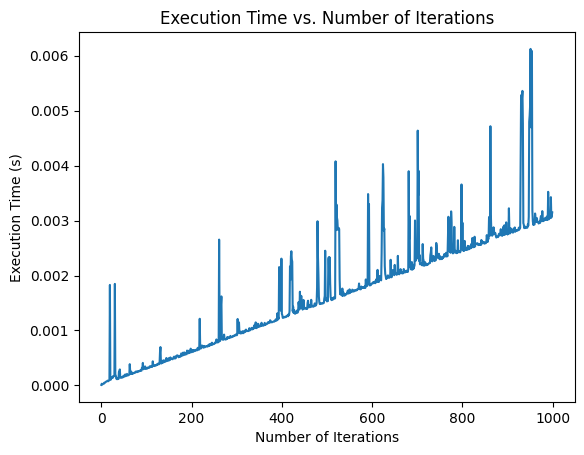

In [ ]:
def time_calculation(n):
  time = dict()
  for i in range(n):
    test_ant = Ant2D(100,100)
    time_taken = timeit(lambda: test_ant.simulation(i), number = 3)
    time[i] = time_taken
  plt.plot(time.keys(), time.values())
  plt.xlabel('Number of Iterations')
  plt.ylabel('Execution Time (s)')
  plt.title('Execution Time vs. Number of Iterations')

time_calculation(1000)